## Forecasting using LSTM - RNN

In this notebook I use LSTM - RNN using Keras and Tensorflow to forecast the pollutant levels.

In [35]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Lambda

In [36]:
#loading data and converting date to datetime format
df = pd.read_csv('air_pollution.csv')
df['date'] = pd.to_datetime(df['date'])

In [37]:
#creating train and test sets
train = df[df['date'].dt.year<2017]
test = df[df['date'].dt.year>=2017]

In [38]:
#dropping date columns
train = train.drop(['date'],axis=1)
test = test.drop(['date'],axis=1)

In [39]:
#Creating a function to make feature and target set by creating sequences
def split_sequences(sequences, n_steps):
    
    X, y = [],[]
    
    #using the number of steps, create sequences to be passed as features in the LSTM-RNN
    for i in range(len(sequences)):
        
        # find the end of the time series
        end_ix = i + n_steps
        
        # check if we are beyond the data
        if end_ix == len(sequences):
            break
            
        # gather features and target sequences from the series
        seq_x, seq_y = np.array(sequences[i:end_ix]), np.array(sequences[end_ix:end_ix+1])
        
        #append to X and y feature and target lists
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [40]:
# getting train and test Feature and Target sets
X_train,y_train = split_sequences(train,12)
X_test,y_test = split_sequences(test,12)

In [41]:
#Defining n_steps and n_features to use as input shape for the LSTM model
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

In [42]:
#creating LSTM-RNN model
model = Sequential()
model.add(LSTM(256,input_shape=(n_steps, n_features),return_sequences=True))
model.add(Lambda(lambda x: x[:, -1:, :])) #this layer ensures the input and output are many-to-many using padding
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 50)

Epoch 1/50
21/21 [==============================] - 1s 38ms/step - loss: 833.1825 - val_loss: 554.4767
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 554.4379 - val_loss: 393.7518
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 397.1266 - val_loss: 291.8975
Epoch 4/50
21/21 [==============================] - 0s 16ms/step - loss: 296.3455 - val_loss: 223.2969
Epoch 5/50
21/21 [==============================] - 0s 16ms/step - loss: 224.5741 - val_loss: 174.1555
Epoch 6/50
21/21 [==============================] - 0s 18ms/step - loss: 176.8359 - val_loss: 145.6273
Epoch 7/50
21/21 [==============================] - 0s 15ms/step - loss: 149.0639 - val_loss: 125.8335
Epoch 8/50
21/21 [==============================] - 0s 15ms/step - loss: 130.5919 - val_loss: 114.1066
Epoch 9/50
21/21 [==============================] - 0s 15ms/step - loss: 119.0436 - val_loss: 106.2676
Epoch 10/50
21/21 [==============================] - 0s 15ms/step - loss:

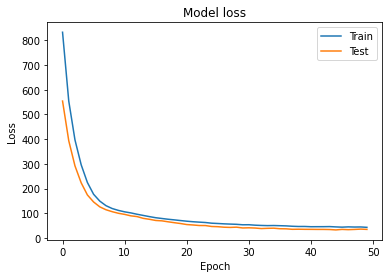

In [43]:
#Looking at the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [44]:
#defining metrics for evaluation
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def rmse(A,F):
    return np.sqrt(np.mean((F-A)**2))

In [45]:
#getting predictions
predictions = model.predict(X_test)

In [46]:
#final results
print('SMAPE: ', smape(y_test.ravel(),predictions.ravel()))
print('RMSE: ', rmse(y_test.ravel(),predictions.ravel()))

SMAPE:  24.349224138758405
RMSE:  5.882990908629967
